<h1>
<font color="#ff2e2e">
Corner Detection
</font>
</h1>

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [15]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> Complete the harris_points function without using OpenCV functions </font></h3>

In [16]:
def harris_points(img):
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.

    '''  
    
    border = 5//2
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    h,w = gray.shape
    smoothed = cv2.GaussianBlur(gray,(5,5),0)
    M = np.zeros((h,w))
    dx = cv2.Sobel(smoothed, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(smoothed, cv2.CV_64F, 0, 1, ksize=3)
    
   
    dx2=dx**2
    dy2=dy**2
    dxy=dx*dy
    
    
    # kernel = np.ones((gray.shape))
    # print(kernel.shape)
    # print(img.shape)
    # sx2 = cv2.filter2D(dx2 ,-1, kernel)
    # sy2 = cv2.filter2D(dy2 ,-1, kernel)
    # sxy = cv2.filter2D(dxy , -1,kernel)
    for y in range(border, h-border):
        for x in range(border, w-border):
            Sx2 = np.sum(dx2[y-border:y+1+border, x-border:x+1+border])
            Sy2 = np.sum(dy2[y-border:y+1+border, x-border:x+1+border])
            Sxy = np.sum(dxy[y-border:y+1+border, x-border:x+1+border])
        
            I = np.array([[Sx2,Sxy],[Sxy,Sy2]])
            det=np.linalg.det(I)
            trace=np.matrix.trace(I)
            R=det-0.04*(trace**2)
            M[y-border, x-border]=R

    
    
    cv2.normalize(M, M, 0, 1, cv2.NORM_MINMAX)
    for y in range(border, h-border):
        for x in range(border, w-border):
            value=M[y, x]
            if value> 0.20:
                cv2.circle(img,(x,y),4,(255,0,0) , -1)

    return img
                

   

<h3><font color = "#079e05"> Show the result </font></h3>

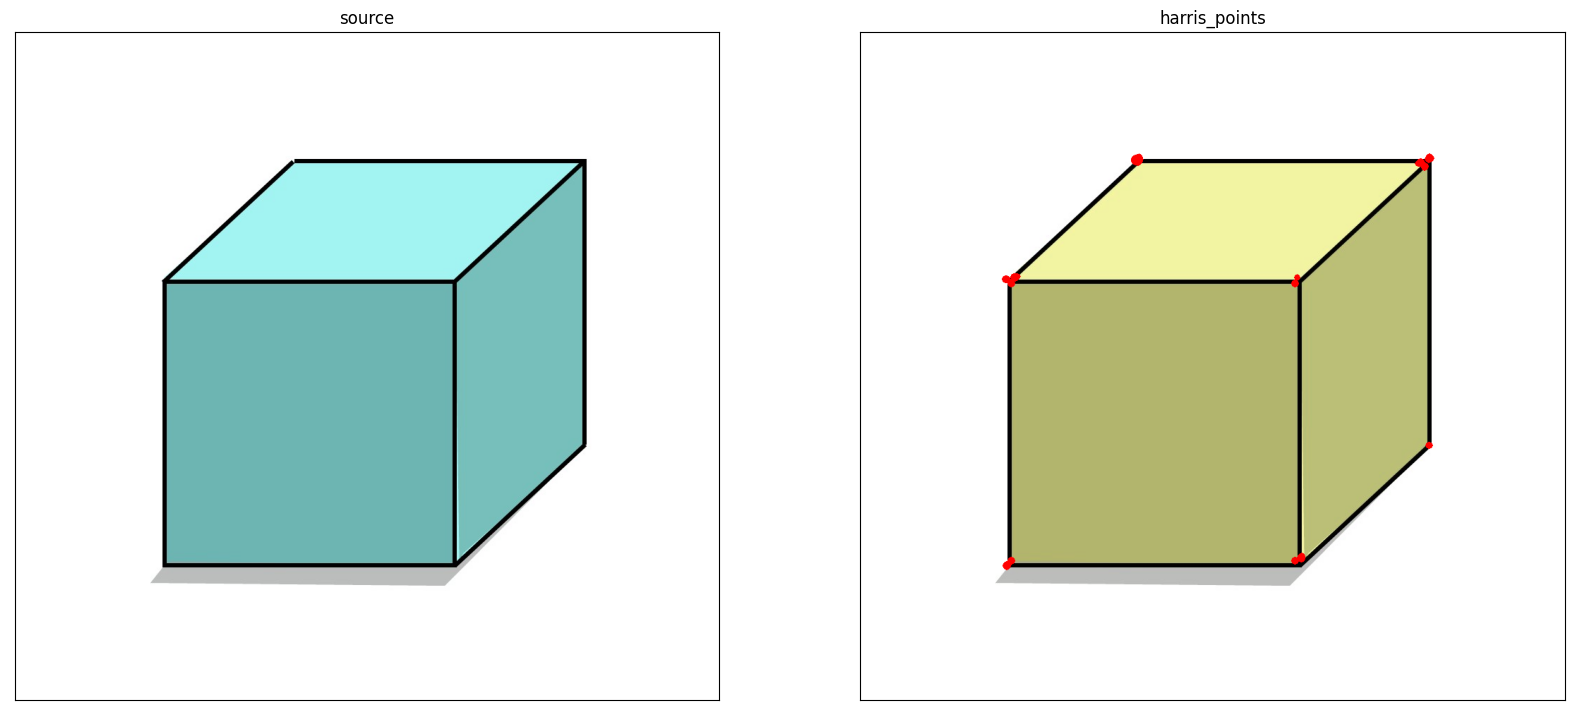

In [17]:
image_list = []
image = cv2.imread(os.path.join('images/Q5', 'harris.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([harris_points(image), 'harris_points', 'img'])
plotter(image_list,1 , 2, True, 20, 10, '7')

<h3><font color = "#079e05"> Complete the harris_points_OpenCV function with using OpenCV functions </font></h3>

In [20]:
def harris_points_OpenCV(image):
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''  
    
   
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY) 

    harris = cv2.cornerHarris(gray,2,5,0.04) 

    harris = cv2.dilate(harris,None)
    thresh = 0.1*harris.max()
    for j in range(0, image.shape[0]):
        for i in range(0, image.shape[1]):
            if(harris[j,i] > thresh):
                pass
            
                cv2.circle( image ,(i, j), 1, (255,0,0), -1)


    

    
    return image

<h3><font color = "#079e05"> Show the result </font></h3>

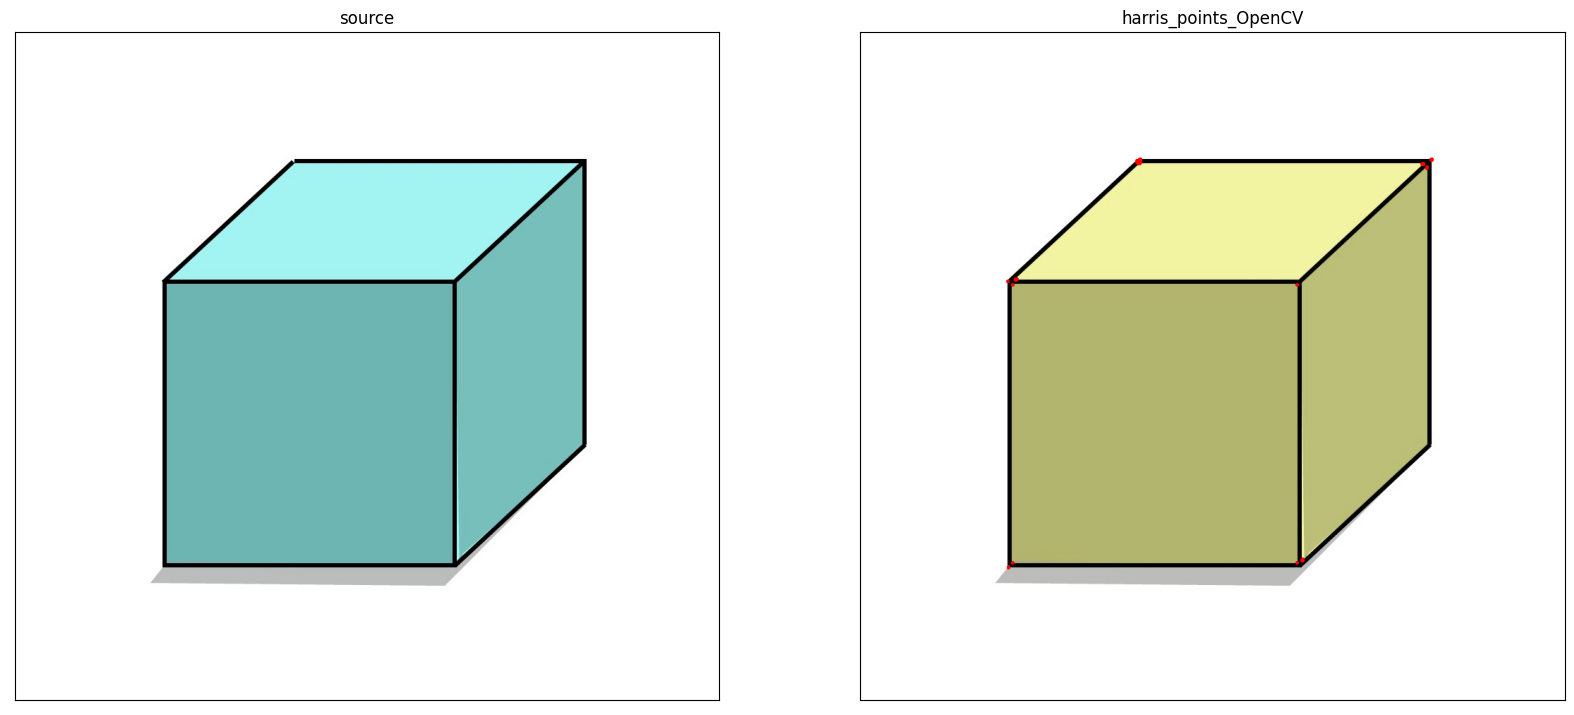

In [21]:
image_list = []
image = cv2.imread(os.path.join('images/Q5', 'harris.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([harris_points_OpenCV(image), 'harris_points_OpenCV', 'img'])
plotter(image_list,1 , 2, True, 20, 10, '7')